In [621]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [622]:
#read training and testing datasets
train_df = pd.read_csv("C:/Users/Issa Laptop/Codes/Titanic_Project/train.csv")  
test_df = pd.read_csv("C:/Users/Issa Laptop/Codes/Titanic_Project/test.csv")
train_df.head()
#i know that you dont want to have a space in the path but i did for 21savage

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [623]:
train_df.shape[0] #Total samples in Training Set


891

In [624]:
test_df.shape[0] #Total samples in Testing Set

418

In [625]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [626]:
train_df["Age"].isnull().sum()/train_df.shape[0]*100 #Age-Missing Percentage 

19.865319865319865

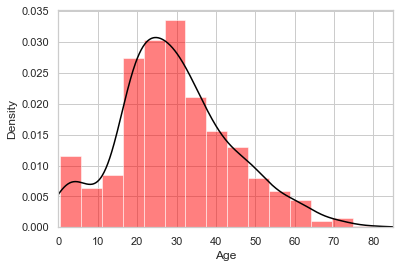

In [627]:
Age_hist = train_df["Age"].hist(bins=15, density=True, stacked=True, color="red", alpha=0.5)
train_df["Age"].plot(kind ="density", color="black")
Age_hist.set(xlabel="Age")
plt.xlim(0,85)
plt.show()

In [628]:
train_df["Age"].mean() #mean age

29.69911764705882

In [629]:
train_df["Age"].median() #median age

28.0

In [630]:
train_df["Cabin"].isnull().sum()/train_df.shape[0]*100 #Cabin-Missing Percentage 

77.10437710437711

In [631]:
train_df["Embarked"].isnull().sum()/train_df.shape[0]*100 #Embarked-Missing Percentage 

0.22446689113355783

In [632]:
print("Total number of people who boarded according to their port(Southampton-S,Queenstown-Q,Chelsea-C)")
print(train_df["Embarked"].value_counts())


Total number of people who boarded according to their port(Southampton-S,Queenstown-Q,Chelsea-C)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [633]:
print("The most common boarding port was Southampton")

The most common boarding port was Southampton


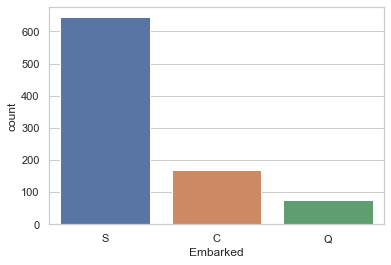

In [634]:
sns.countplot(x='Embarked',data=train_df)
plt.show()

In [635]:
train_data=train_df.copy()

In [636]:
train_data.drop(columns="Cabin",inplace=True) #Missing percentage too high

In [637]:
train_data["Age"].fillna(train_df["Age"].median(),inplace=True) #Most common age value

In [638]:
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True) #Most common boarding point

In [639]:
train_data.isnull().sum() #missing values have been adjusted successfully

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

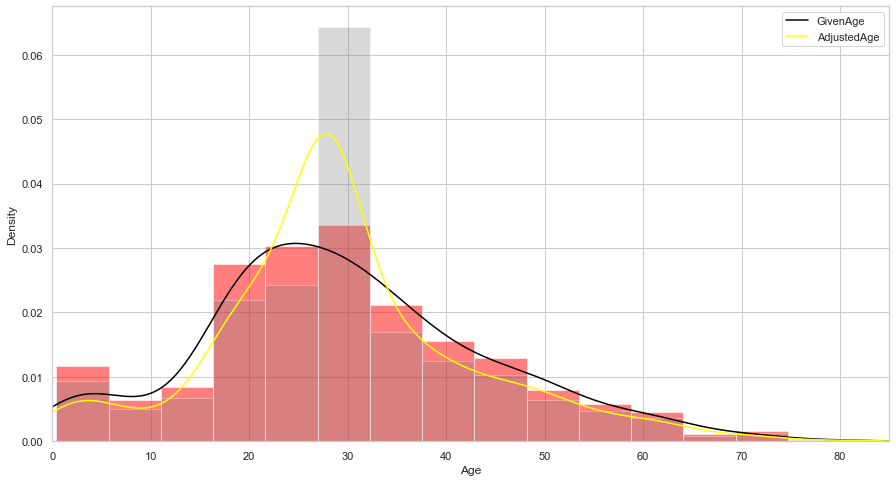

In [640]:
#Compare age values
plt.figure(figsize=(15,8))
Age_Compare = train_df["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.5)
train_df["Age"].plot(kind='density', color='black')
Age_Compare = train_data["Age"].hist(bins=15, density=True, stacked=True, color='grey', alpha=0.3)
train_data["Age"].plot(kind='density', color='yellow')
Age_Compare.legend(['GivenAge', 'AdjustedAge'])
Age_Compare.set(xlabel='Age')
plt.xlim(0,85)
plt.show()

In [641]:
#Was the traveler alone or not?
train_data["TravelledAlone"]=np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)

In [642]:
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [643]:
#training set is completed
final_train=pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"])
final_train.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelledAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [644]:
#starting with test dataframe
#checking for missing values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [645]:
#Fixing missing data
test_data=test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(),inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(),inplace=True)
test_data.drop("Cabin",axis=1,inplace=True)

#Travel Alone
test_data["TravelledAlone"]=np.where((test_data["SibSp"]+test_data["Parch"])>0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

#making the final testing set
final_test=pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"])
final_test.head()



,PassengerId,Name,Age,Ticket,Fare,TravelledAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,330911,7.8292,1,0,0,1,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,0,1,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,0,1,0,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,0,1,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,0,1,0,0,1,1,0


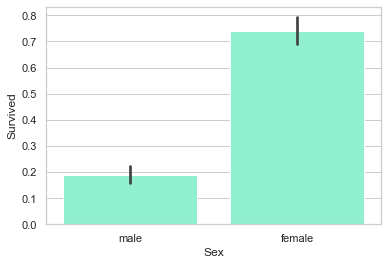

total number of women who survived : 233
total number of men who survived : 109


In [646]:
#Analysis of Data on basis Survival
#Analysis on basis of Gender
sns.barplot('Sex','Survived',data=train_df,color="aquamarine")
plt.show()

survivors_w=train_data.loc[train_data.Sex=='female']['Survived']
print("total number of women who survived :",sum(survivors_w))

survivors_m=train_data.loc[train_data.Sex=='male']['Survived']
print("total number of men who survived :",sum(survivors_m))

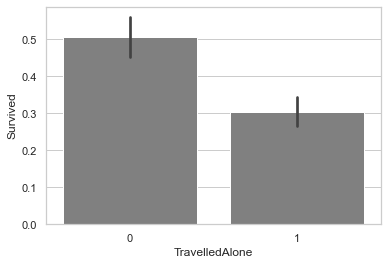

total number of people who travelled alone who survived : 163
total number of people who did not travel alone who survived : 179


In [647]:
#Analysis on basis of companions
sns.barplot('TravelledAlone','Survived',data=final_train,color='grey')
plt.show()

survivors_a=final_train[final_train.TravelledAlone==1]['Survived']
print("total number of people who travelled alone who survived :",sum(survivors_a))

survivors_na=final_train[final_train.TravelledAlone==0]['Survived']
print("total number of people who did not travel alone who survived :",sum(survivors_na))

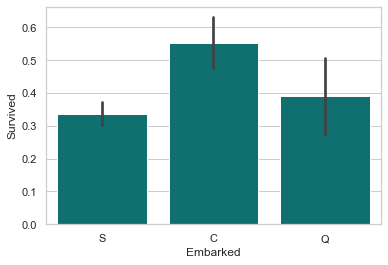

total number of people from Southampton who survived : 219
total number of people from Queenstwon who survived : 30
total number of people from Chelsea who survived : 93


In [648]:
#Analysis on basis of boarding port
sns.barplot('Embarked','Survived',data=train_df,color="teal")
plt.show()

survivors_s=train_data[train_data.Embarked=='S']['Survived']
print("total number of people from Southampton who survived :",sum(survivors_s))

survivors_q=train_data[train_data.Embarked=='Q']['Survived']
print("total number of people from Queenstwon who survived :",sum(survivors_q))

survivors_c=train_data[train_data.Embarked=='C']['Survived']
print("total number of people from Chelsea who survived :",sum(survivors_c))

In [649]:
final_train.drop(['Name','Ticket'], axis='columns', inplace=True)


In [650]:

X=final_train.drop('Survived',axis=1)
y=final_train['Survived']


In [651]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.469,random_state=0)


In [652]:
from sklearn.metrics import accuracy_score
#LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
predictions_lr = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(predictions_lr,y_test)*100,2)
print(accuracy_lr)

77.75


In [653]:
final_predictions_lr=pd.DataFrame({'PassengerId':final_test['PassengerId'],'Survived':predictions_lr})

In [654]:
final_predictions_lr.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [656]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
prediction_dt = decisiontree.predict(X_test)
accuracy_dt = round(accuracy_score(prediction_dt, y_test) * 100, 2)
print(accuracy_dt)

68.9
